# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Tenth Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 06 December 2016</span>


# Deep Networks

### Topics to be discussed 
* **AutoEncoders**
* ** Deep AutoEncoders**
* **Representation Learning**
* **Distributed Representation**
* **Data Compression**

In [80]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
import time
from scipy.linalg import norm
import sompylib.sompy as SOM


# we need to install tensor flow
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

%matplotlib inline

## Review to PCA from the point of view of encoding/decoding (reconstruction)


###  1: Encoding: X_trans = X.dot(PC)
* **X is (Nxd) matrix, PC is a (dxd) matrix ---- > (Nxd) dot (dxd) --- > X_trans is (Nxd)**

### 2: Decoding: X_recon = Xtrans.dot(PCs.T)
* **X_trans is (Nxd), PC.T (dxd) --- > X_recon is (Nxd)**


## Encoding/Decoding with no compression
![](Images/PCA_Full.png)

## Encoding/Decoding with  compression
![](Images/PCA_lower.png)

### With this compression or dimensionality reduced encoding:
* **We reduce the required memory**
* ** But we loose information**

## Some experiments with MNIST data set and PCA

In [82]:
"""Test the autoencoder using MNIST."""
# %%
# load MNIST as before
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mean_img = np.mean(mnist.train.images, axis=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
import random
test_xs = mnist.test.images
test_xs_labels= mnist.test.labels
test_xs_norm = np.array([img - mean_img for img in test_xs])
import random
ind_row_test = random.sample(range(test_xs.shape[0]),500)

In [31]:
from sklearn.decomposition import PCA
train_xs = mnist.train.images
train_xs_norm = np.array([img - mean_img for img in train_xs])
# test_xs_labels= mnist.test.labels
pca = PCA()
pca.fit(train_xs_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
W_pca = pca.components_
W_pca.shape

(784, 784)

## No dimensionality reduction
### No reconstruction error

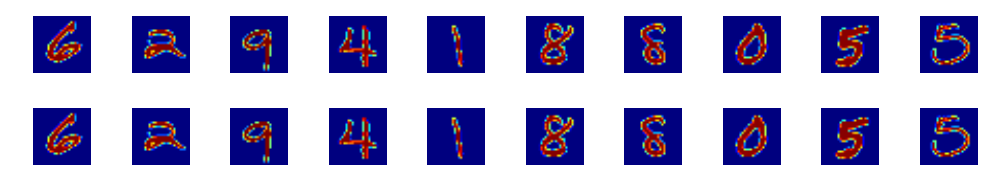

In [84]:
W_pca = pca.components_
sel_comp = W_pca.shape[1]
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

## With dimensionality reduction
### Reconstruction error

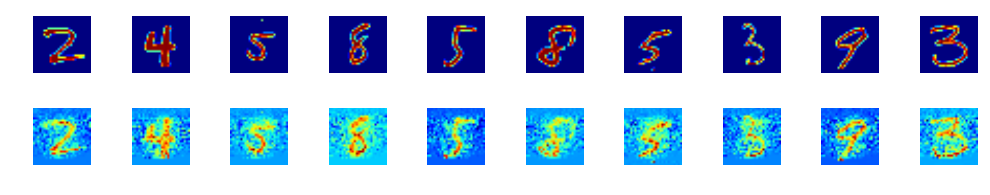

In [44]:
W_pca = pca.components_
sel_comp = 400
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

## With more dimensionality reduction

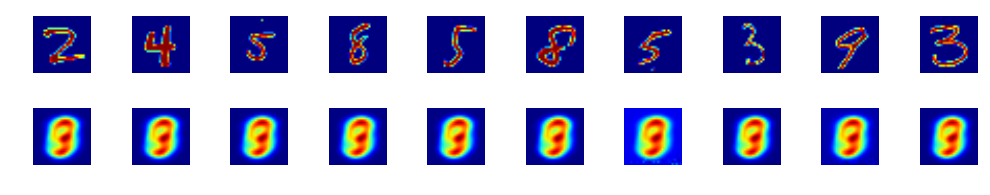

In [46]:
W_pca = pca.components_
sel_comp = 2
lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
lowdim_PCA.shape
recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

### Auto Encoders: Supervised kind of PCA reconstruction
![](Images/AutoEncoder.png)


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4e3bf605748634864343e8c5ffa335f301cbf955)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7fa0e56273a1cb32709b442e2421e9f947522b84)


**elementwise activation function makes layers differentiable: https://en.wikipedia.org/wiki/Activation_function**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/370f7b6aee47860a36b808c19582c0caaeb9c3a4)



**Loss function**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/cafbacd34534f23e90f73c0aa39fda11e29696ab)

**Backpropogarion algorithm and Stochastic gradient descent updates all the parameters after each training data**


# Deep Auto-Encoders
#### Hinton 2006 
https://www.cs.toronto.edu/~hinton/science.pdf
**"It has been obvious since the 1980s that
backpropagation through deep autoencoders
would be very effective for nonlinear dimensionality
reduction, provided that computers
were fast enough, data sets were big enough,
and the initial weights were close enough to a
good solution. All three conditions are now
satisfied"**
* ** The IDEA: we take the output of first PCA and train another PCA until the last encoder layer**
![](Images/DeepAutoEncoder.png)
# <a></a>

# Professional implementations:
## Python libraries 
* **TensorFlow**
* **Theano**
* **Keras on top of two previous ones**
* **Lasagna on top of Theano**
## Other languages
## Torch in Lua
## Cafe in C++
## ...

# Tensor Flow
* https://github.com/tensorflow
### Introduced by Google in November 2015 

## Deep Autoencoders in Tensorflow

In [49]:
"""Tutorial on how to create an autoencoder w/ Tensorflow.
Parag K. Mital, Jan 2016
"""
# %% Imports
import tensorflow as tf
import numpy as np
import math


# %% Autoencoder definition
def autoencoder(dimensions=[784, 512, 256, 64]):
    """Build a deep autoencoder w/ tied weights.
    Parameters
    ----------
    dimensions : list, optional
        The number of neurons for each layer of the autoencoder.
    Returns
    -------
    x : Tensor
        Input placeholder to the network
    z : Tensor
        Inner-most latent representation
    y : Tensor
        Output reconstruction of the input
    cost : Tensor
        Overall cost to use for training
    """
    # %% input to the network
    x = tf.placeholder(tf.float32, [None, dimensions[0]], name='x')
    current_input = x

    # %% Build the encoder
    encoder = []
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input = int(current_input.get_shape()[1])
        W = tf.Variable(
            tf.random_uniform([n_input, n_output],
                              -1.0 / math.sqrt(n_input),
                              1.0 / math.sqrt(n_input)))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
#         output = tf.nn.sigmoid(tf.matmul(current_input, W) + b)
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% latent representation
    z = current_input
    encoder.reverse()

    # %% Build the decoder using the same weights
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% now have the reconstruction through the network
    y = current_input

    # %% cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x))
    return {'x': x, 'z': z, 'y': y, 'cost': cost}


(0, 2260.5969)
(1, 2345.9619)
(2, 2164.1616)
(3, 2284.0586)
(4, 2171.3252)
(5, 2170.9302)
(6, 2257.7222)
(7, 2312.5186)
(8, 2258.9768)
(9, 2128.1711)
(10, 2244.8877)
(11, 2286.3074)
(12, 2086.2466)
(13, 2237.4482)
(14, 2132.1738)


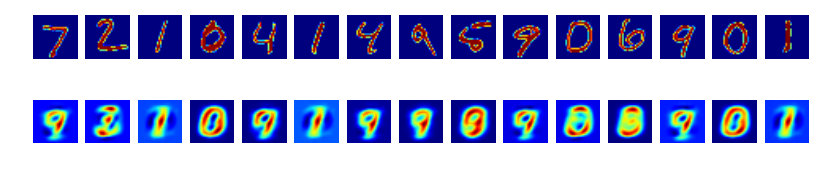

In [50]:
ae = autoencoder(dimensions=[784, 256, 64,2])
# ae = autoencoder(dimensions=[784,1000,500,250,2])

# %%
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])
# %%
# We create a session to use the graph
sess = tf.Session()
sess.run(tf.initialize_all_variables())
# %%
# Fit all training data
batch_size = 50
n_epochs = 15
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        train = np.array([img - mean_img for img in batch_xs])
        sess.run(optimizer, feed_dict={ae['x']: train})
    print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))

# %%
# Plot example reconstructions
n_examples = 15
# test_xs, _ = mnist.test.next_batch(n_examples)
# test_xs_norm = np.array([img - mean_img for img in test_xs])
# recon = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})
# fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
# for example_i in range(n_examples):
#     axs[0][example_i].imshow(
#         np.reshape(test_xs[example_i, :], (28, 28)))
#     axs[0][example_i].set_axis_off()
#     axs[1][example_i].imshow(
#             np.reshape([recon[example_i, :] + mean_img], (28, 28)))
#     axs[1][example_i].set_axis_off()

# fig.show()
# plt.draw()
# #     plt.waitforbuttonpress()



In [64]:
recon_AE = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})+ mean_img
lowdim_AE = sess.run(ae['z'], feed_dict={ae['x']: test_xs_norm})

## Comparing the results with SOM and PCA

In [52]:
Data_tr = train_xs_norm + 1e-32*np.random.randn(train_xs_norm.shape[0],train_xs_norm.shape[1])
somMNIST = SOM.SOM('som1', Data_tr, mapsize = [60, 60],norm_method = 'var',initmethod='pca')
# som1 = SOM.SOM('som1', D, mapsize = [1, 100],norm_method = 'var',initmethod='pca')
somMNIST.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook_MNIST = somMNIST.codebook[:]

/Users/SVM/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)



Total time elapsed: 31.124000 secodns
final quantization error: 18.624067


In [56]:
codebook_MNIST_n = SOM.denormalize_by(somMNIST.data_raw, codebook_MNIST, n_method = 'var') + mean_img

In [65]:
bmu_test = somMNIST.project_data(test_xs_norm)

In [66]:
recon_SOM = codebook_MNIST_n[bmu_test]
lowdim_SOM = somMNIST.ind_to_xy(bmu_test)

In [67]:
lowdim_SOM.shape

(10000, 3)

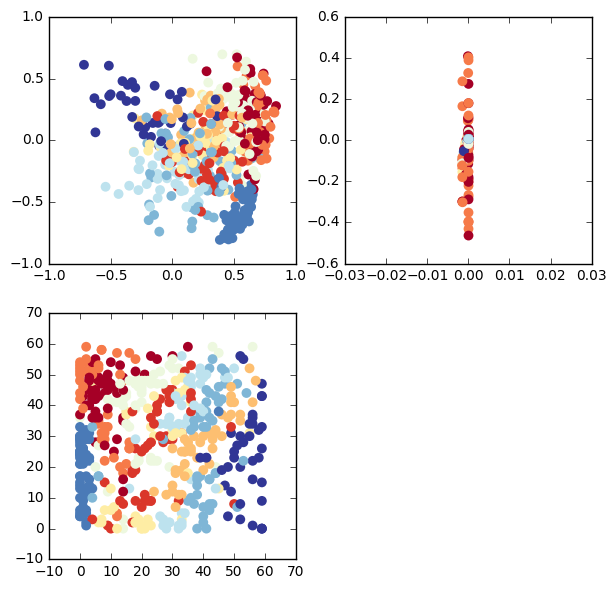

In [68]:
fig = plt.figure()
K = 9
c = np.argmax(test_xs_labels[ind_row_test],axis=1)
plt.subplot(2,2,1)
plt.scatter(lowdim_AE[ind_row_test,0],lowdim_AE[ind_row_test,1],s=50,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

plt.subplot(2,2,2)
plt.scatter(lowdim_PCA[ind_row_test,0],lowdim_PCA[ind_row_test,1],s=50,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

plt.subplot(2,2,3)
plt.scatter(lowdim_SOM[ind_row_test,0],lowdim_SOM[ind_row_test,1],s=50,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

fig.set_size_inches(7,7);

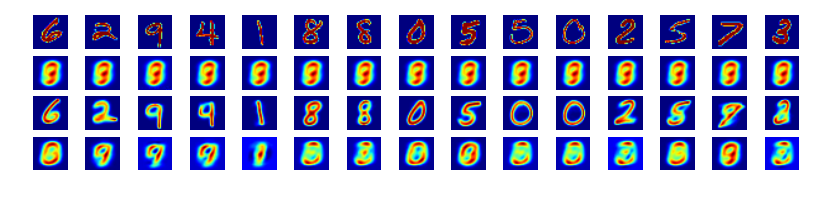

In [69]:
fig, axs = plt.subplots(4, n_examples, figsize=(10, 2))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()
    axs[2][example_i].imshow(
            np.reshape([recon_SOM[ind, :]], (28, 28)))
    axs[2][example_i].set_axis_off()
    
    axs[3][example_i].imshow(
            np.reshape([recon_AE[ind, :]], (28, 28)))
    axs[3][example_i].set_axis_off()
fig.show()
plt.draw()

In [70]:
# %% Basic test
"""Test the autoencoder using MNIST."""
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import matplotlib.pyplot as plt

# %%
# load MNIST as before
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mean_img = np.mean(mnist.train.images, axis=0)
ae2 = autoencoder(dimensions=[784, 256,120,80 ,64])
# ae = autoencoder(dimensions=[784,1000,500,250,2])

# %%
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae2['cost'])
# %%
# We create a session to use the graph
sess = tf.Session()
sess.run(tf.initialize_all_variables())
# %%
# Fit all training data
batch_size = 50
n_epochs = 30
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        train = np.array([img - mean_img for img in batch_xs])
        sess.run(optimizer, feed_dict={ae2['x']: train})
    print(epoch_i, sess.run(ae2['cost'], feed_dict={ae2['x']: train}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(0, 928.37579)
(1, 693.08087)
(2, 574.77576)
(3, 571.0658)
(4, 606.55933)
(5, 494.16708)
(6, 500.60724)
(7, 488.35834)
(8, 486.41672)
(9, 435.34338)
(10, 426.84286)
(11, 410.18555)
(12, 432.5549)
(13, 417.92957)
(14, 396.871)
(15, 446.33643)
(16, 402.04132)
(17, 438.88245)
(18, 377.25)
(19, 403.39957)
(20, 403.737)
(21, 442.78268)
(22, 388.60901)
(23, 402.48154)
(24, 360.93533)
(25, 381.02432)
(26, 384.79068)
(27, 345.21225)
(28, 390.64124)
(29, 392.71304)


In [71]:
lowdim_AE2 = sess.run(ae2['z'], feed_dict={ae2['x']: test_xs_norm})
recon_AE2 = sess.run(ae2['y'], feed_dict={ae2['x']: test_xs_norm})+ mean_img

In [72]:
somMNIST2 = SOM.SOM('som1', lowdim_AE2, mapsize = [60, 60],norm_method = 'var',initmethod='pca')
# som1 = SOM.SOM('som1', D, mapsize = [1, 100],norm_method = 'var',initmethod='pca')
somMNIST2.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook_MNIST2 = somMNIST2.codebook[:]

/Users/SVM/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)



Total time elapsed: 16.232000 secodns
final quantization error: 4.716347


In [73]:
codebook_MNIST_n2 = SOM.denormalize_by(somMNIST2.data_raw, codebook_MNIST2, n_method = 'var') 

In [74]:
bmu_test2 = somMNIST2.project_data(lowdim_AE2)

In [75]:
recon_SOM2 = codebook_MNIST_n2[bmu_test2]
lowdim_SOM2 = somMNIST2.ind_to_xy(bmu_test2)

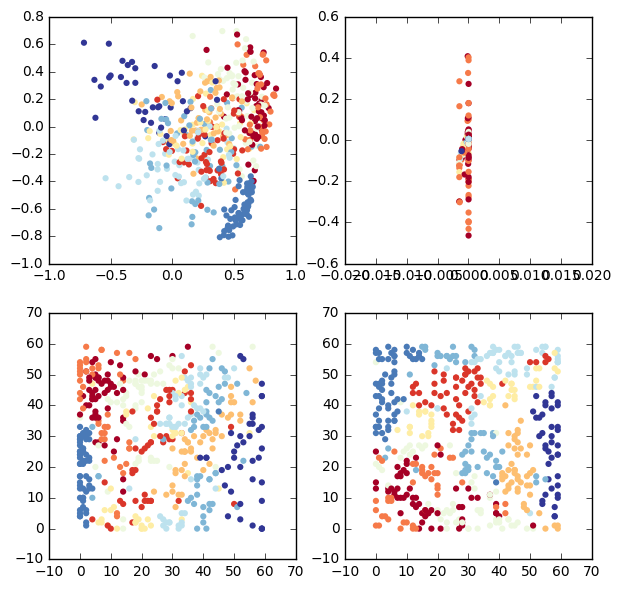

In [76]:
fig = plt.figure()
K = 9
c = np.argmax(test_xs_labels[ind_row_test],axis=1)
plt.subplot(2,2,1)
plt.scatter(lowdim_AE[ind_row_test,0],lowdim_AE[ind_row_test,1],s=20,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

plt.subplot(2,2,2)
plt.scatter(lowdim_PCA[ind_row_test,0],lowdim_PCA[ind_row_test,1],s=20,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

plt.subplot(2,2,3)
plt.scatter(lowdim_SOM[ind_row_test,0],lowdim_SOM[ind_row_test,1],s=20,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));

plt.subplot(2,2,4)
plt.scatter(lowdim_SOM2[ind_row_test,0],lowdim_SOM2[ind_row_test,1],s=20,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(c)/float(K)));


fig.set_size_inches(7,7);

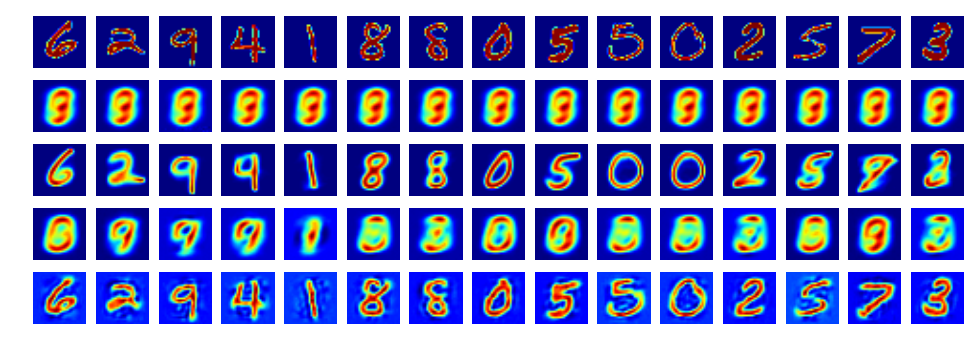

In [79]:
fig, axs = plt.subplots(5, n_examples, figsize=(12, 4))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([recon_PCA[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()
    axs[2][example_i].imshow(
            np.reshape([recon_SOM[ind, :]], (28, 28)))
    axs[2][example_i].set_axis_off()
    axs[3][example_i].imshow(
            np.reshape([recon_AE[ind, :]], (28, 28)))
    axs[3][example_i].set_axis_off()
    axs[4][example_i].imshow(
            np.reshape([recon_AE2[ind, :]], (28, 28)))
    axs[4][example_i].set_axis_off()

    
fig.show()

# Distributed representation: Local and non-local representation


# Local representation (usually in manifold learning)

![](http://www.cis.hut.fi/somtoolbox/theory/img1.gif)

* ** classically, each ball is one complete prototypical result**
* ** it is very fast to learn and it is data efficient**
* ** it works well, if we now the features of the system**


# Distributed representation (Deep Learning)
![](http://neuralnetworksanddeeplearning.com/images/tikz41.png)

* ** each path of activations of balls along the network is one possible prototipical result**
* ** It is a kind of distributed media or distributed memory, where elements are contributing partially**
* ** it is slower and data hungry**
* ** but it learns new representation, while learning to perform other task (e.g. classifications)**
* ** by addding each layer the representational space expands exponentially**


# With similar Idea one can play with the architucture of the network

### MLP for prediction
![](Images/MLP1.png)

In [48]:
'''
A Multilayer Perceptron implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
# 784-500-500-2000-10
n_hidden_1 = 500 # 1st layer number of features
n_hidden_2 = 500 # 2nd layer number of features
n_hidden_3 = 2000 # 3nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
#     # Hidden layer with RELU activation
#     layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
#     layer_4 = tf.nn.relu(layer_4)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer



In [28]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
#     'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
 
    
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
#     'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


In [29]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print 'Epoch: {} cost:{}'.format((epoch+1), avg_cost)
    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 1 cost:4967.03599715
Epoch: 2 cost:1201.68045733
Epoch: 3 cost:627.089116647
Epoch: 4 cost:357.710033902
Epoch: 5 cost:216.578428099
Epoch: 6 cost:152.352168699
Epoch: 7 cost:123.776701263
Epoch: 8 cost:95.3451340529
Epoch: 9 cost:91.7803615027
Epoch: 10 cost:80.0975201203
Epoch: 11 cost:68.0433037817
Epoch: 12 cost:69.4345873057
Epoch: 13 cost:71.023024734
Epoch: 14 cost:64.4197545282
Epoch: 15 cost:66.1767842783
Epoch: 16 cost:53.1724298491
Epoch: 17 cost:47.0739591957
Epoch: 18 cost:47.9663738386
Epoch: 19 cost:50.0686005419
Epoch: 20 cost:47.5231084377
Optimization Finished!
Accuracy: 0.9666


## Nevertheless, this is not the benchmark result. There are some other tricks, which improves the results to above 99%
* **Droup out**
* **Convolutional Deep Networks**
* **...**

# Furhter examples
* https://github.com/aymericdamien/TensorFlow-Examples
# Tensorflow playground
* http://playground.tensorflow.org

# Architectural Diversity of Deep Network
# Plug and play Machine Learning
http://www.asimovinstitute.org/neural-network-zoo/



## Siamese network
[Chopra,Hadsell,LeCun](https://www.cs.nyu.edu/~sumit/research/assets/cvpr05.pdf)
![](https://www.cs.nyu.edu/~sumit/research/files/page1_7.png)


# An interesting new application:
* Conceptually similar to Word2vec and learning contextual similarity
* https://www.cs.cornell.edu/~sbell/pdf/siggraph2015-bell-bala.pdf